---

_You are currently looking at **version 1.5** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Assignment 2 - Temperature Overshooting.



 An NOAA dataset has been stored in the file `fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.
 
 Each row in the assignment datafile corresponds to a single observation.
 
 The following variables are provided to you:
 
 * **id** : station identification code
 * **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
 * **element** : indicator of element type
     * TMAX : Maximum temperature (tenths of degrees C)
     * TMIN : Minimum temperature (tenths of degrees C)
 * **value** : data value for element (tenths of degrees C)
 

 The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

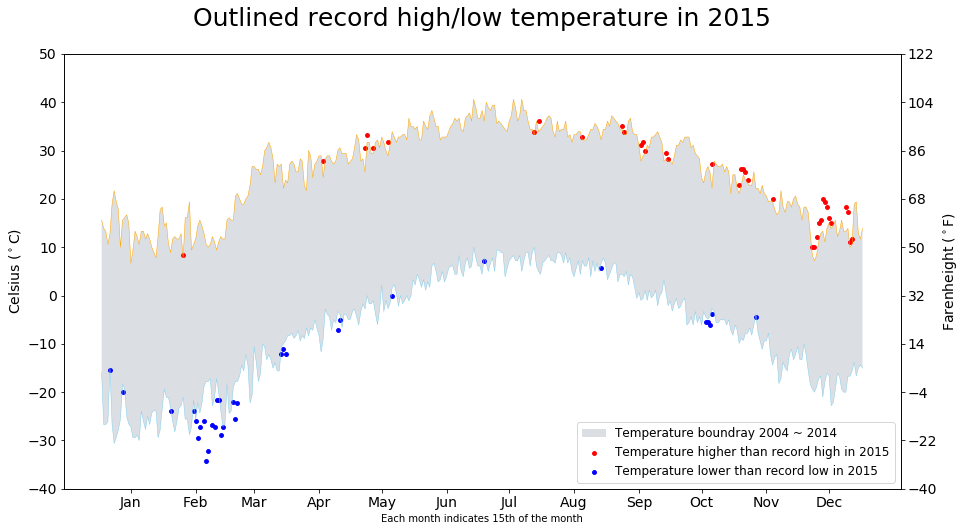

In [4]:

def makeChart():
    df = pd.read_csv('fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
    df['Data_Value'] = df['Data_Value']/10
    hdf = df[df.Date.str.contains("2015|02-29") == False]
    df2015 = df[df.Date.str.contains("2015")]
    
    array = [[], [], []]
    array1 = [[], []]
    array2 = [[], []]
    array3 = [[], []]
    
    for group, frame in hdf.groupby(hdf.Date.str.split('\d{4}\-').str[1]): 
        maxT = np.max(frame['Data_Value'])    
        minT = np.min(frame['Data_Value'])
        array[0].append(maxT)
        array[1].append(minT)
        array[2].append(group)
    
    for group, frame in df2015.groupby(df2015.Date.str.split('\d{4}\-').str[1]): 
        maxT = np.max(frame['Data_Value'])    
        minT = np.min(frame['Data_Value'])
        array1[0].append(maxT)
        array1[1].append(minT)
    
    
    for i in range(0, len(array[0])-1):
        if array[0][i] < array1[0][i]:
            array2[0].append(i)
            array2[1].append(array1[0][i])
        if array[1][i] > array1[1][i]:
            array3[0].append(i)
            array3[1].append(array1[1][i])
    
    plt.figure(figsize = (15,8))

    plt.gca().fill_between(array[2], 
                           array[0], array[1], 
                           facecolor='slategrey', 
                           alpha=0.25)
    plt.gca().title.set_position([.5, 1.05])
    plt.scatter(array2[0], array2[1], s=15, color = 'red') 
    plt.scatter(array3[0], array3[1], s=15, color = 'blue')
    
    x_ticks = [day for day in array[2] if '-15' in day]
    x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    
    plt.xticks(x_ticks, x_labels, fontsize=14)
    plt.xlabel('Each month indicates 15th of the month', fontsize=10)
    plt.yticks(fontsize=14)
    
    axes = plt.gca()
    axes.set_ylim([-40,50])
    
    cyticks = [((t * 9 / 5) + 32) for t in plt.yticks()[0]]
    plt.ylabel('Celsius ($^\circ$C)', fontsize=14)
    plt.title('Outlined record high/low temperature in 2015', fontsize=25)
    plt.legend(['Temperature boundray 2004 ~ 2014', 'Temperature higher than record high in 2015', 'Temperature lower than record low in 2015'], loc=4, fontsize=12)
    plt.plot(array[0], linewidth=0.5, color = 'orange')
    plt.plot(array[1], linewidth=0.5, color = 'skyblue')
    plt.gca().twinx()
    axes = plt.gca()
    plt.ylabel('Farenheight ($^\circ$F)', fontsize=14)     
    plt.yticks(cyticks, fontsize = 14)

    return plt.show()
makeChart()
